In [10]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('../01_preprocess/ycsb_c_init_new.csv')
# Calculate the percentile brackets
df['percentile bracket'] = pd.qcut(df['time'], q=10, labels=False, duplicates='drop') + 1
df.drop(['time'], axis=1, inplace=True)
#df.drop(['cycle', 'instr', 'LLC_miss','CPU','L1_miss', 'br_miss', 'scale', 'counted_final_key_count', 'GHz', 'time', 'task', 'IPC'], axis=1, inplace=True)
df.head()

,config_name,const_basicHintCount,const_enableBasicHead,const_enableDense,const_enableDense2,const_enableDensifySplit,const_enableHash,const_enableHashAdapt,const_enableHeadNode,const_enablePrefix,...,const_pageSizeLeaf,data_name,data_size,data_sorted,density,payload_size,rand_seed,ycsb_range_len,ycsb_zipf,percentile bracket
0,hash,16,1,0,0,0,1,0,0,1,...,8192,data/urls,3549112,0,0.565766,8,1706825703,100,0.555915,1
1,dense3,16,1,1,0,1,0,0,0,1,...,2048,data/urls,4518270,0,0.981231,8,1706825710,100,0.243399,6
2,hints,16,1,0,0,0,0,0,0,1,...,2048,data/urls,4355364,0,0.549877,8,1706825719,100,0.591915,6
3,hints,16,1,0,0,0,0,0,0,1,...,2048,data/urls,3843649,0,0.523239,8,1706825728,100,1.430872,5
4,hints,16,1,0,0,0,0,0,0,1,...,4096,data/urls,3189960,0,0.515427,8,1706825732,100,0.851920,6


In [11]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(['object']).columns

print("Number of columns:", df.shape[1])

# Apply one-hot encoding to non-numeric columns
df = pd.get_dummies(df, columns=non_numeric_columns)

print("Number of columns after one-hot:", df.shape[1])

Number of columns: 27
Number of columns after one-hot: 29


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 

# Split the dataframe into features (X) and target (y)
X = df.drop('percentile bracket', axis=1)
y = df['percentile bracket']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
# Create a Logistic Regression classifier
classifier = LogisticRegressionCV(cv=10)

# Train the classifier on the training data
classifier.fit(X_train, y_train)
X_test = scaler.transform(X_test)  
# Predict the target variable for the test data
y_pred = classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


/home/roland/.cache/pypoetry/virtualenvs/code-RswzgKQQ-py3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/roland/.cache/pypoetry/virtualenvs/code-RswzgKQQ-py3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver opti

Accuracy: 0.48142292490118577


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 

# Split the dataframe into features (X) and target (y)
X = df.drop('percentile bracket', axis=1)
y = df['percentile bracket']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
# Create a Logistic Regression classifier
classifier = LogisticRegression()

# Train the classifier on the training data
classifier.fit(X_train, y_train)
X_test = scaler.transform(X_test)  
# Predict the target variable for the test data
y_pred = classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7103113270037535


/home/roland/.cache/pypoetry/virtualenvs/code-RswzgKQQ-py3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


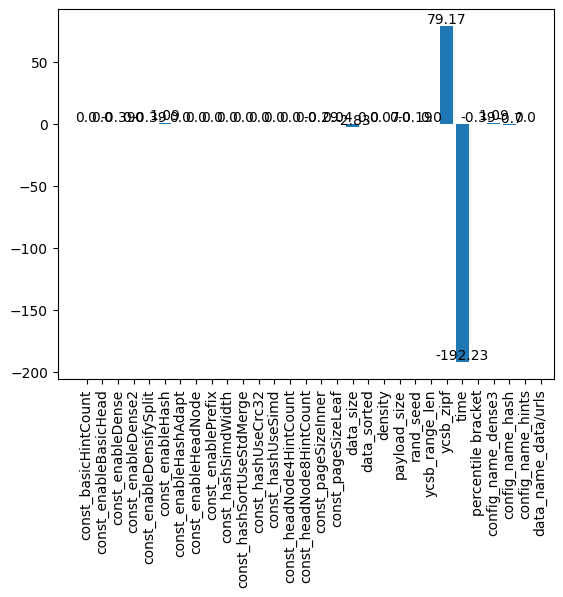

In [19]:
importance_names = ['const_basicHintCount', 'const_enableBasicHead', 'const_enableDense', 'const_enableDense2', 'const_enableDensifySplit', 'const_enableHash', 'const_enableHashAdapt', 'const_enableHeadNode', 'const_enablePrefix', 'const_hashSimdWidth', 'const_hashSortUseStdMerge', 'const_hashUseCrc32', 'const_hashUseSimd', 'const_headNode4HintCount', 'const_headNode8HintCount', 'const_pageSizeInner', 'const_pageSizeLeaf', 'data_size', 'data_sorted', 'density', 'payload_size', 'rand_seed', 'ycsb_range_len', 'ycsb_zipf', 'time', 'percentile bracket', 'config_name_dense3', 'config_name_hash', 'config_name_hints', 'data_name_data/urls']

importance_values = importance

plt.bar([x for x in range(len(importance_values))], importance_values)
plt.xticks(range(len(importance_names)), importance_names, rotation=90)

for i, v in enumerate(importance_values):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
# Split the dataframe into features (X) and target (y)
X = df.drop('percentile bracket', axis=1)
y = df['percentile bracket']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
# Create a Logistic Regression classifier
classifier = LogisticRegression()

# Train the classifier on the training data
classifier.fit(X_train, y_train)
X_test = scaler.transform(X_test)  
# Predict the target variable for the test data
y_pred = classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.645949720670391


/home/roland/.cache/pypoetry/virtualenvs/code-RswzgKQQ-py3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
